In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:/Desktop/high_freq.csv")
df["day"] = pd.to_datetime(df["day"])
df.set_index(["day", "code"], inplace=True)
df = df.astype("float32")
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8988570 entries, (Timestamp('2022-10-11 09:31:00'), 'sh600010') to (Timestamp('2023-04-13 15:00:00'), 'sz300999')
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   open    float32
 1   close   float32
 2   high    float32
 3   low     float32
 4   volume  float32
dtypes: float32(5)
memory usage: 207.0+ MB


In [3]:
from scutquant import scutquant as q
from scutquant import alpha

In [4]:
df["label"] = q.price2ret(df["close"], groupby="code")
df["label"].describe()

count    8.988008e+06
mean     5.129227e-06
std      1.660800e-03
min     -1.999799e-01
25%     -6.097555e-04
50%      0.000000e+00
75%      5.570650e-04
max      1.345397e-01
Name: label, dtype: float64

In [5]:
kwargs = {
    "data": df,
    "open": "open",
    "close": "close",
    "high": "high",
    "low": "low",
    "volume": "volume"
}
X = alpha.make_factors(kwargs, windows=[5, 10, 20], fillna=True)
X = pd.concat([X, df["label"]], axis=1)
X.dropna(inplace=True)
X.info()

time used: 623.0702013969421
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8985308 entries, (Timestamp('2022-10-11 09:40:00'), 'sh600010') to (Timestamp('2023-04-13 14:57:00'), 'sz300661')
Columns: 105 entries, DIF to label
dtypes: float32(41), float64(64)
memory usage: 5.7+ GB


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8985308 entries, (Timestamp('2022-10-11 09:40:00'), 'sh600010') to (Timestamp('2023-04-13 14:57:00'), 'sz300661')
Columns: 105 entries, DIF to label
dtypes: float32(105)
memory usage: 3.5+ GB
None
X_mis= 0.0
clean dataset done 

split data done 

label norm done 

The distribution of y_train:


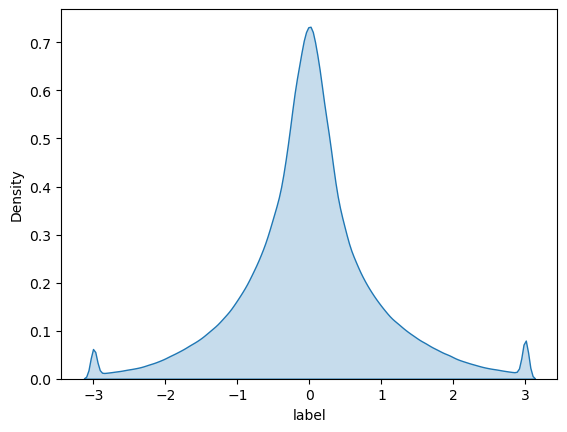

The distribution of y_valid:


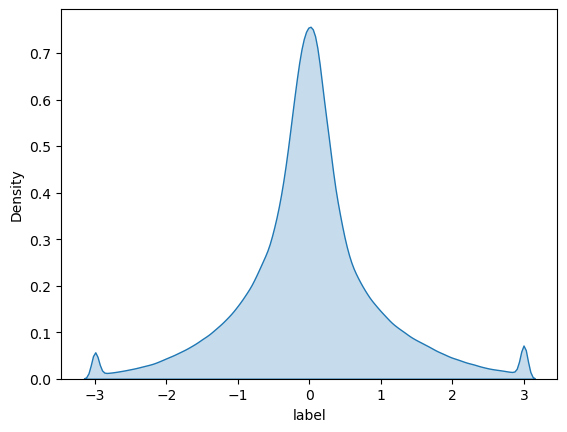

The distribution of y_test:


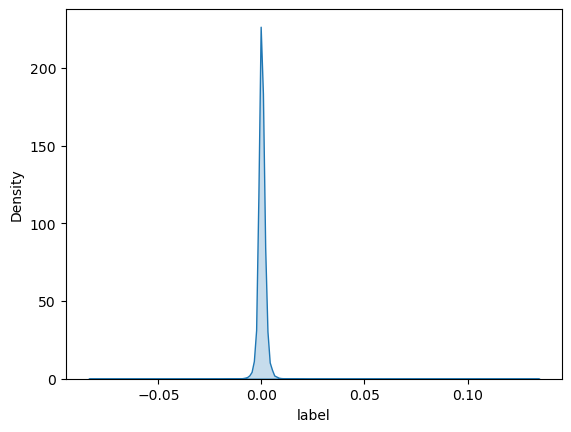

norm data done 

all works done 



In [6]:
X = X.astype("float32")
split_params = {
    "test_start_date": "2023-03-13",
    "split_method": "split",
    "split_kwargs":{
        "train": 0.7,
        "valid": 0.3
        
    } 
}
result = q.auto_process(X, "label", groupby="code", split_params=split_params, select=False, orth=False, clip=5)

X_train, y_train, X_valid, y_valid = result["X_train"], result["y_train"], result["X_valid"], result["y_valid"]
X_test, y_test, ymean, ystd = result["X_test"], result["y_test"], result["ymean"], result["ystd"]

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4944012 entries, (Timestamp('2022-10-11 09:50:00'), 'sh600010') to (Timestamp('2023-03-10 15:00:00'), 'sz300999')
Columns: 104 entries, DIF to VMEAN
dtypes: float64(104)
memory usage: 3.9+ GB


In [8]:
X_train.astype("float32").to_pickle("D:/Desktop/high_freq/X_train.pkl")

In [9]:
X_valid.astype("float32").to_pickle("D:/Desktop/high_freq/X_valid.pkl")
X_test.astype("float32").to_pickle("D:/Desktop/high_freq/X_test.pkl")
y_train.astype("float32").to_pickle("D:/Desktop/high_freq/y_train.pkl")
y_valid.astype("float32").to_pickle("D:/Desktop/high_freq/y_valid.pkl")
y_test.astype("float32").to_pickle("D:/Desktop/high_freq/y_test.pkl")
ymean.astype("float32").to_pickle("D:/Desktop/high_freq/ymean.pkl")
ystd.astype("float32").to_pickle("D:/Desktop/high_freq/ystd.pkl")

In [10]:
df_test = df[df.index.isin(X_test.index)]
df_test.astype("float32").to_pickle("D:/Desktop/high_freq/df_test.pkl")